In [15]:
from railroad import load_graph, save_graph, test_road_graph
import matplotlib.pyplot as plt
import json
from scipy.signal import find_peaks
import numpy as np
import pandas as pd

from railroad import plot_node_graph

from scipy.ndimage import gaussian_filter1d
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

from railroad import CustomJSONEncoder, custom_json_decoder
from utils import print_graph_info

from shapely.geometry import LineString, Point
import networkx as nx
from utils import osmnx_to_geopandas
import json

In [16]:
with open("../data/standard_variables.json", "r") as f:
    standard_variables_data = json.load(f)


xlim = (standard_variables_data['map_limits']['west'],
        standard_variables_data['map_limits']['east'])
ylim = (standard_variables_data['map_limits']['south'],
        standard_variables_data['map_limits']['north'])
print(xlim, ylim)

standard_variables_data

(-22.083955, -21.640345) (64.033992, 64.188968)


{'map_limits': {'north': 64.188968,
  'south': 64.033992,
  'east': -21.640345,
  'west': -22.083955},
 'grid_size': {'unit': 'meters', 'value': 100},
 'standard_variables': {'cutoff_radius': {'unit': 'meters', 'value': 400}}}

In [17]:
G = load_graph('../data/final_railroads.json')
print_graph_info(G)

Undirected has 89 nodes and 94 edges
+----------------------+
Nodes
+----------------------+
*** Node: 1848219055 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.81 64.086)>, 'year': 2025, 'is_station': True, 'if_final_stop_of_any_kind': True}
*** Node: 602729079 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.844 64.09)>, 'year': 2025, 'is_station': True, 'if_final_stop_of_any_kind': True}
*** Node: 111465687 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.872 64.099)>, 'year': 2025, 'is_station': True, 'if_final_stop_of_any_kind': True}
*** Node: 2320789566 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.88 64.102)>, 'year': 2025}
*** Node: 2320771865 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.882 64.102)>, 'year': 2025, 'is_station': True, 'if_final_stop_of_any_kind': True}
*** Node: 2328470640 ***
  Data: {'street_count': 3, 'geometry': <POINT (-21.887 64.11)>, 'year': 2025, 'is_station': True, 'if_final_stop_of_any_kind': True}
+-------

In [18]:
# plot_node_graph(G, xlim, ylim, add_map=False)

In [19]:
def undirected_road_to_directed(G: nx.graph):
    G_directed = nx.DiGraph()

In [20]:
G_2025 = G.copy()
nodes_to_remove = [node for node, data in G_2025.nodes(
    data=True) if data.get('year') != 2025]
G_2025.remove_nodes_from(nodes_to_remove)
edges_to_remove = [(u, v) for u, v, data in G_2025.edges(
    data=True) if data.get('year') != 2025]
G_2025.remove_edges_from(edges_to_remove)
print(f"Number of nodes in G_2025: {G_2025.number_of_nodes()}")
print(f"Number of edges in G_2025: {G_2025.number_of_edges()}")
save_graph(G_2025, '../data/final_railroads_2025.json')

nodes_gdf, edges_gdf = osmnx_to_geopandas(G)
edges_gdf.to_file("../data/final_railroads_2025.geojson", driver="GeoJSON")
nodes_gdf.to_file(
    "../data/final_railroads_2025_nodes.geojson", driver="GeoJSON")

G_2029 = G.copy()
nodes_to_remove = [node for node, data in G_2029.nodes(
    data=True) if data.get('year') > 2029]
G_2029.remove_nodes_from(nodes_to_remove)
edges_to_remove = [(u, v) for u, v, data in G_2029.edges(
    data=True) if data.get('year') > 2029]
G_2029.remove_edges_from(edges_to_remove)
print(f"Number of nodes in G_2029: {G_2029.number_of_nodes()}")
print(f"Number of edges in G_2029: {G_2029.number_of_edges()}")
save_graph(G_2029, '../data/final_railroads_2029.json')

nodes_gdf, edges_gdf = osmnx_to_geopandas(G_2029)
edges_gdf.to_file("../data/final_railroads_2029.geojson", driver="GeoJSON")
nodes_gdf.to_file(
    "../data/final_railroads_2029_nodes.geojson", driver="GeoJSON")

G_2030 = G.copy()
print(f"Number of nodes in G_2030: {G_2030.number_of_nodes()}")
print(f"Number of edges in G_2030: {G_2030.number_of_edges()}")
save_graph(G_2030, '../data/final_railroads_2030.json')

nodes_gdf, edges_gdf = osmnx_to_geopandas(G_2030)
edges_gdf.to_file("../data/final_railroads_2030.geojson", driver="GeoJSON")
nodes_gdf.to_file(
    "../data/final_railroads_2030_nodes.geojson", driver="GeoJSON")

Number of nodes in G_2025: 57
Number of edges in G_2025: 57
Number of nodes in G_2029: 77
Number of edges in G_2029: 81
Number of nodes in G_2030: 89
Number of edges in G_2030: 94


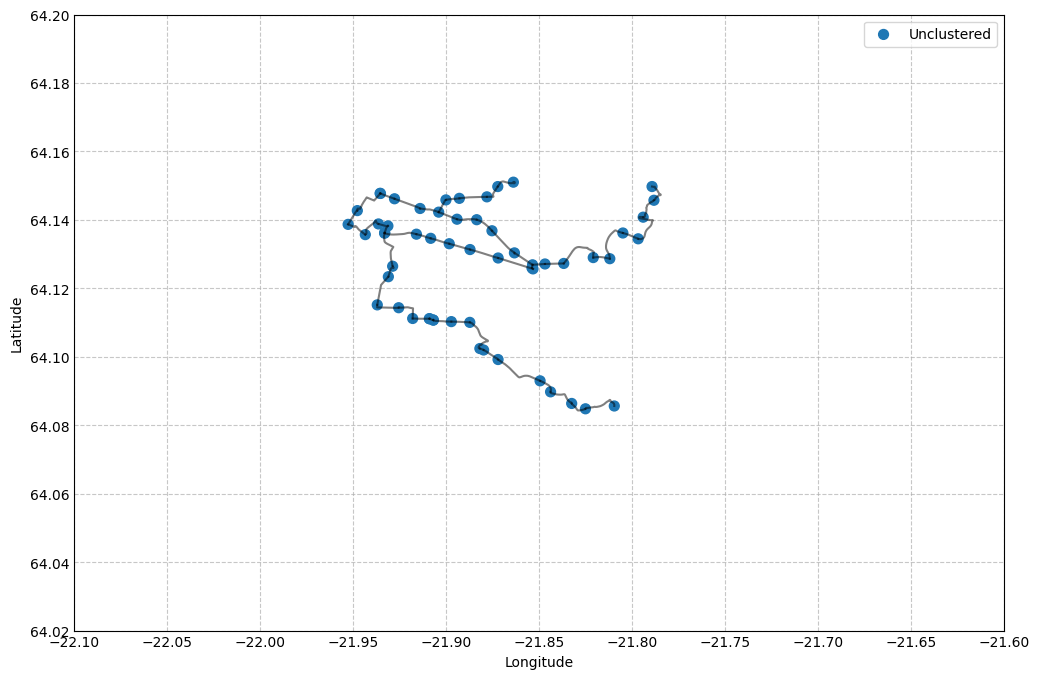

Is the graph connected? True


In [21]:
plot_node_graph(G_2025, xlim, ylim, add_map=False)
is_connected = nx.is_connected(G_2025)
print(f"Is the graph connected? {is_connected}")

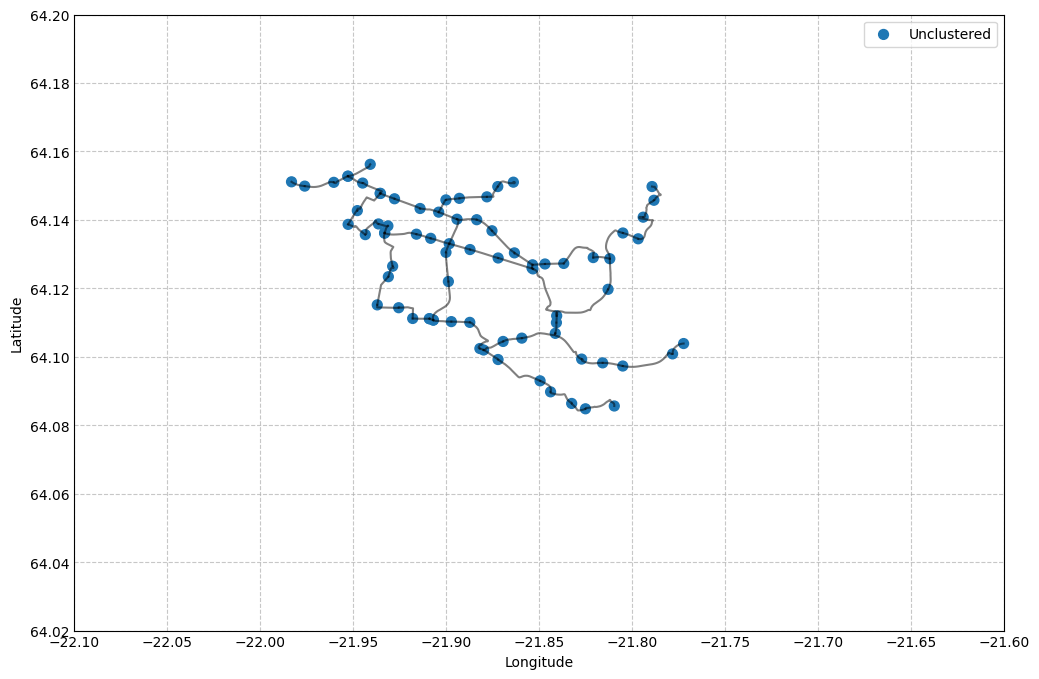

Is the graph connected? True


In [22]:
plot_node_graph(G_2029, xlim, ylim, add_map=False)
is_connected = nx.is_connected(G_2029)
print(f"Is the graph connected? {is_connected}")

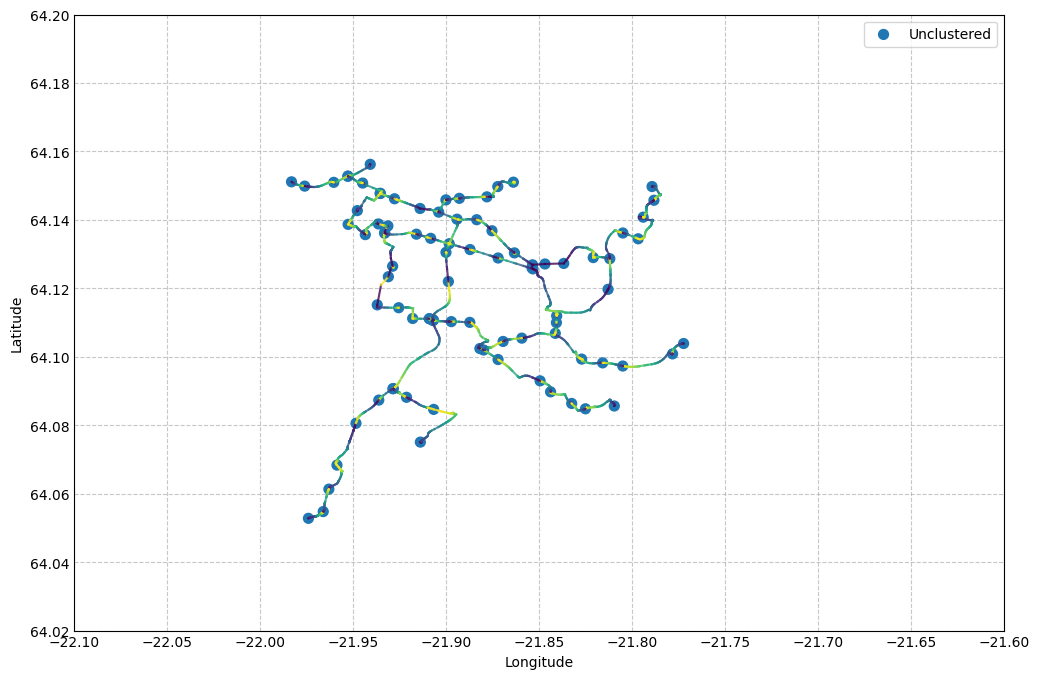

Is the graph connected? True


In [23]:
plot_node_graph(G_2030, xlim, ylim, add_map=False, color_segments=True)
is_connected = nx.is_connected(G_2030)
print(f"Is the graph connected? {is_connected}")

In [24]:
with open("../data/manual_routes.json", "r") as f:
    manual_routes_data = json.load(f)


print(manual_routes_data)

{'2025': {'r1': [1848219055, 12339218096, 111465687, 2328470640, 11142383860, 323282788, 59980770], 'g1': [1344359843, 12339218106, 34512506, 5048474491, 34512506, 1225420655, 59980770], 'b1': [1344359843, 1344359843, 1208295444, 1206684191]}, '2029': {'r1': [1848219055, 12339218096, 111465687, 2328470640, 11142383860, 323282788, 59980770], 'g1': [1344359843, 12339218106, 34512506, 5048474491, 34512506, 1225420655, 26478210, 26471908, 1225420655, 59980770], 'b1': [1344359843, 1344359843, 1208295444, 1206684191], 'r2': [406311222, 12339218098, 2328470640, 12339218100, 35786587, 59980770], 'g2': [1344359843, 12339218106, 12339218093, 1225420655, 59980770], 'b2': [1344359843, 1208295444, 1201238872, 2320771865, 384966546]}, '2030': {'r1': [1848219055, 12339218096, 111465687, 2328470640, 11142383860, 323282788, 59980770], 'g1': [1344359843, 12339218106, 34512506, 5048474491, 34512506, 1225420655, 26478210, 26471908, 1225420655, 59980770], 'b1': [1344359843, 1344359843, 1208295444, 12066841

In [25]:
Gs = {'2025': G_2025, '2029': G_2029, '2030': G_2030}

In [26]:
12339218105 in G_2030.nodes()

True

In [27]:
full_routes = {}

for year, G in Gs.items():

    print(f"Year: {year}\n")
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f'{12339218105 in G.nodes() = }')
    test_road_graph(G)
    full_routes[year] = {}
    routes = manual_routes_data[year]
    for route, stops in routes.items():
        print(f"\nRoute: {route}")
        print(f"Stops: {stops}\n")
        full_routes[year][route] = [stops[0]]
        for i in range(len(stops) - 1):
            start = stops[i]
            end = stops[i + 1]
            print(f"Start: {start} ", start in G.nodes)
            print(f"End: {end} ", end in G.nodes)
            try:
                path = nx.shortest_path(G, source=start, target=end)
                full_routes[year][route].extend(path[1:])
                print(f"Shortest path from {start} to {end}: {path}")
            except nx.NetworkXNoPath:
                print(f"No path between {start} and {end}")
                raise
        print(f"Full route: {full_routes[year][route]}")
        print(f"Length of full route: {len(full_routes[year][route])}")
        assert all(G.has_node(node) for node in full_routes[year][route]
                   ), f"Route {route} in year {year} contains nodes that are not in the graph"

print(full_routes)

Year: 2025

Number of nodes: 57
Number of edges: 57
12339218105 in G.nodes() = False

Route: r1
Stops: [1848219055, 12339218096, 111465687, 2328470640, 11142383860, 323282788, 59980770]

Start: 1848219055  True
End: 12339218096  True
Shortest path from 1848219055 to 12339218096: [1848219055, 12339218094, 12339218095, 602729079, 12339218096]
Start: 12339218096  True
End: 111465687  True
Shortest path from 12339218096 to 111465687: [12339218096, 111465687]
Start: 111465687  True
End: 2328470640  True
Shortest path from 111465687 to 2328470640: [111465687, 2320789566, 2320771865, 2328470640]
Start: 2328470640  True
End: 11142383860  True
Shortest path from 2328470640 to 11142383860: [2328470640, 12339218099, 1889922204, 1896201758, 470330027, 384966546, 534441279, 12339218101, 11142383860]
Start: 11142383860  True
End: 323282788  True
Shortest path from 11142383860 to 323282788: [11142383860, 12339218091, 323282788]
Start: 323282788  True
End: 59980770  True
Shortest path from 323282788 t

In [28]:
with open("../data/full_routes.json", "w") as f:
    json.dump(full_routes, f, indent=4)